In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

## Instantiate a Basemap object

In [11]:
# create a new BaseMap object with a Mercator projection
m = Basemap(projection="merc",
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180)

## Read CSV datasets into respective Pandas DataFrames

In [13]:
import pandas as pd

# read CSV data into DataFrame objects
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

# print("First airlines row:\n{row}".format(row=airlines.iloc[0]))
# print()
# print("First airports row:\n{row}".format(row=airports.iloc[0]))
# print()
# print("First routes row:\n{row}".format(row=routes.iloc[0]))

## Get the airport lats/lons and use the basemap instance to convert them to X/Y coordinates relevant to the projection, etc. 

In [9]:
# convert latitude and longitude values to Cartesian coordinates in order to display them on a two-dimensional map
latitudes = airports["latitude"].tolist()
longitudes = airports["longitude"].tolist()
x, y = m(longitudes, latitudes)

## Now we have coordinates we can use to create a scatter plot

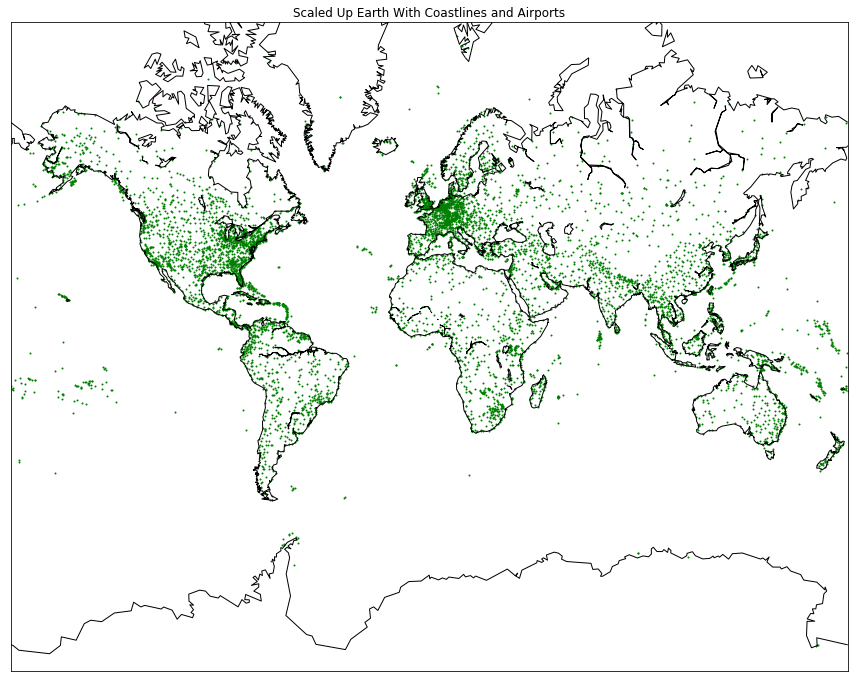

In [23]:
# Basemap uses matplotlib under the hood, includng the figure and Axes objects,
# so we can use these to modify the plot directly as if we were only using matplotlib
fig, ax = plt.subplots(figsize=(15, 20))
ax.set_title("Scaled Up Earth With Coastlines and Airports")

# call the Basemap scatter plot functionality
m.scatter(x, y, s=1, c="green")

# include the coastlines
m.drawcoastlines()

### Highlight routes between aiports using Basemap's "Great Circle"

1. Read the CSV dataset "geo_routes", which contains start and end lat/lon values for each route, into a Pandas DataFrame.
2. Create a function that draws great circles from points in a DataFrame where the routes don't cross the top/bottom or left/right borders of the map.
3. Filter the geo_routes DataFrame to only routes that start at the airport with code "DFW"
4. Call the function that draws great circles with the filtered DataFrame as the argument.

In [30]:
# define the function to draw great cirles for each row of a DataFrame which
# contains start/end lat/lon values for an airline route between airports
def create_great_circles(df):

    # get a Basemap instance
    fig, ax = plt.subplots(figsize=(15,20))
    m = Basemap(projection='merc', 
                llcrnrlat=-80, 
                urcrnrlat=80, 
                llcrnrlon=-180, 
                urcrnrlon=180)
    m.drawcoastlines()

    # iterate over each row of the DataFrame
    for index, row in df.iterrows():
        
        # make sure we only plot routes that don't go from one side of the map to another, 
        # since this is unsupported by Basemap's drawgreatcircle() function
        if (abs(row["end_lat"] - row["start_lat"]) < 180) \
            and (abs(row["end_lon"] - row["start_lon"]) < 180):
            
            # we're good, draw the route as a "great circle"
            m.drawgreatcircle(row["start_lon"],
                              row["start_lat"],
                              row["end_lon"],
                              row["end_lat"])

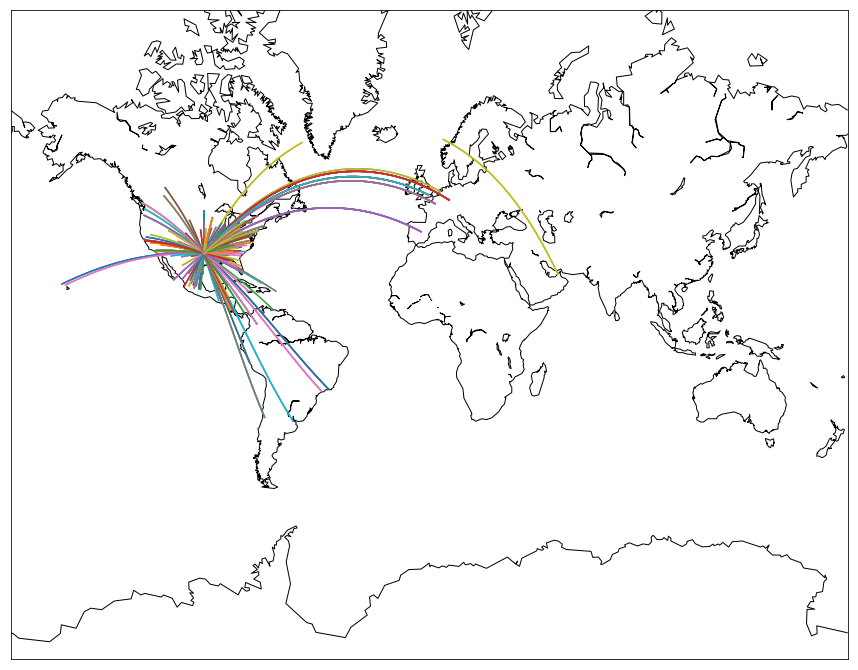

In [31]:
# read the routes dataset containing start/end lat/lon points
geo_routes = pd.read_csv("geo_routes.csv")            

# filter out only routes which start at DFW (Dallas-Fort Worth) airport
dfw = geo_routes[geo_routes["source"] == "DFW"]

# draw the routes using the function defined above
create_great_circles(dfw)